In [15]:
import numpy as np 
from sklearn.utils import shuffle
import scipy.optimize as op
import matplotlib.pyplot as plt

In [16]:
X = np.linspace(0, 100, 1000) # 1000 values between 0 and 100
delta = np.random.uniform(-10, 10, X.size)
y = 0.4*X + 3 + delta

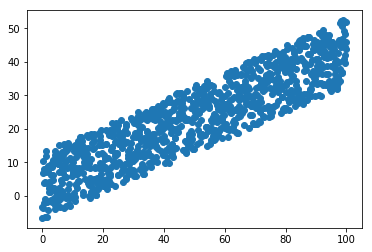

In [17]:
fig, ax = plt.subplots()
ax.scatter(X,y)
plt.show()

In [18]:
X = X.reshape((-1,1))
print(X.shape)
print(y.shape)

m, n = X.shape


# intercept
ones = np.ones((m, 1))
X = np.append(ones, X, axis=1)
n += 1

# parameters
theta0 = np.zeros(n)

(1000, 1)
(1000,)


Sklearn

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_)

[3.28420841 0.39872793]


Gradient

In [20]:
def J(theta, X, y):
    m, n = X.shape 
    h = X @ theta
    return 1 / (2 * m) * ((h-y)**2).sum()

In [21]:
def gradient(theta, X, y):
    if X.ndim == 1 :
        X = X.reshape((1,len(X)))
    
    h = X @ theta
    
    return ((h - y) @ X)

Shuffle x and y

In [22]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1234)

Batch gradient

In [23]:
def batch_gradient(theta, X, y, iters, alpha):
    m, n = X.shape
    cost = []
    for i in range(iters):
        theta = theta - ((alpha / m) * gradient(theta, X, y))
        cost.append(J(theta, X, y))
    return theta, cost

In [30]:
theta, cost = batch_gradient(theta0, X, y, iters=1000, alpha=0.0005)
print(theta)

[0.39231462 0.44208789]


Results bellow look so wrong, to be investigated...

Stochastic gradient descent

In [31]:
def stochastic_gradient(theta, X, y, alpha):
    m, n = X.shape
    cost = []
    for i, x in enumerate(X):
        theta = theta - alpha * gradient(theta, x, y[i])
        cost.append(J(theta, X, y))
    return theta, cost

In [32]:
theta, cost = stochastic_gradient(theta0, X, y, alpha=0.0005)
print(theta)

[74.31556843  0.62457939]


Mini batch gradient

In [33]:
def mini_batch_gradient(theta, X, y, alpha, beta):
    m, n = X.shape
    cost = []
    for i, x in enumerate(X):
        if (i % beta == 0):
            theta = theta - ((alpha / beta) * gradient(theta, X[i:i+beta], y[i:i+beta]))
            cost.append(J(theta, X, y))
    return theta, cost

In [34]:
theta, cost = mini_batch_gradient(theta0, X, y, alpha=0.0005, beta=10)
print(theta)

[0.04973832 0.42169068]


In [38]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1234)

print('-- batch = 10 => mini batch gradient --')
theta, cost = mini_batch_gradient(theta0, X, y, alpha=0.0005, beta=10)
print(theta)

print('-- batch = 1 => stochastic gradient --')
theta, cost = mini_batch_gradient(theta0, X, y, alpha=0.0005, beta=1)
print(theta)

print('-- stochastic gradient --')
theta, cost = stochastic_gradient(theta0, X, y, alpha=0.0005)
print(theta)

-- batch = 10 => mini batch gradient --
[0.04713735 0.47027965]
-- batch = 1 => stochastic gradient --
[70.03776976  0.4477218 ]
-- stochastic gradient --
[70.03776976  0.4477218 ]


Scipy

In [37]:
# check gradient function
def linear_regression(X, y, theta):
    result = op.minimize(fun=J, x0=theta, args=(X, y), method='TNC', jac=gradient)
    return result.x
theta = linear_regression(X, y, theta)
print(theta)

[3.43252428 0.39670134]
